# Predict Energy Behavior of Prosumers

## Introduction

Questions to Address

* Business Classification:
    * Predict whether the prosumer is a business or not based on the features. 
* Electricity Prices:
    * Predict the price of electricity and what features are having an impact on this price

In [1]:
# import necessary libraries
library(dplyr)
library(reshape2)
library(corrplot)
library(rjson)
library(glmnet)
library(MASS)
library(caret)
library(pROC)
library(klaR)


Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


corrplot 0.92 loaded

Loading required package: Matrix

Loaded glmnet 4.1-8


Attaching package: 'MASS'


The following object is masked from 'package:dplyr':

    select


Loading required package: ggplot2

Loading required package: lattice

Type 'citation("pROC")' for a citation.


Attaching package: 'pROC'


The following objects are masked from 'package:stats':

    cov, smooth, var




## LDA and QDA on basic dataset

### LDA

In [2]:
# load the data
# client data
client <- read.csv('data/client.csv')

# county_id_to_name_map data
county_id_to_name <- fromJSON(file="county_id_to_name_map.json")
county_id_to_name <- as.data.frame(county_id_to_name)

# electricity prices data
electricity <- read.csv('data/electricity_prices.csv')

# gas prices data
gas <- read.csv('data/gas_prices.csv')

# drop the date and forecast_date column
client = subset(client, select = -c(date))
electricity = subset(electricity, select = -c(origin_date))
gas = subset(gas, select = -c(origin_date))

electricity = subset(electricity, select = -c(forecast_date))
gas = subset(gas, select = -c(forecast_date))

# merge the three datasets
df <- merge(client, electricity, by = 'data_block_id')
df <- merge(df, gas, by = 'data_block_id')
head(df)

,data_block_id,product_type,county,eic_count,installed_capacity,is_business,euros_per_mwh,lowest_price_per_mwh,highest_price_per_mwh
,<int>,<int>,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,2,1,0,108,952.89,0,96.99,45.62,46.29
2,2,1,0,108,952.89,0,94.77,45.62,46.29
3,2,1,0,108,952.89,0,93.88,45.62,46.29
4,2,1,0,108,952.89,0,92.25,45.62,46.29
5,2,1,0,108,952.89,0,91.83,45.62,46.29
6,2,1,0,108,952.89,0,98.62,45.62,46.29


In [4]:
# LDA
lda <- lda(is_business ~ euros_per_mwh + lowest_price_per_mwh + installed_capacity + eic_count + county + product_type + highest_price_per_mwh, data = df)
print(lda)

Call:
lda(is_business ~ euros_per_mwh + lowest_price_per_mwh + installed_capacity + 
    eic_count + county + product_type + highest_price_per_mwh, 
    data = df)

Prior probabilities of groups:
        0         1 
0.4632273 0.5367727 

Group means:
  euros_per_mwh lowest_price_per_mwh installed_capacity eic_count   county
0      157.1564             95.17206           1267.700 113.46240 7.161602
1      157.8121             95.83925           1608.749  38.72339 7.414031
  product_type highest_price_per_mwh
0     2.001545              107.9380
1     1.810502              108.7805

Coefficients of linear discriminants:
                                LD1
euros_per_mwh         -4.243005e-05
lowest_price_per_mwh  -1.515436e-03
installed_capacity     6.205327e-04
eic_count             -1.162763e-02
county                 4.508450e-03
product_type          -1.977076e-01
highest_price_per_mwh  1.594215e-03


### QDA

In [5]:
# QDA
qda <- qda(is_business ~ euros_per_mwh + lowest_price_per_mwh + installed_capacity + eic_count + county + product_type + highest_price_per_mwh, data = df)
print(qda)

Call:
qda(is_business ~ euros_per_mwh + lowest_price_per_mwh + installed_capacity + 
    eic_count + county + product_type + highest_price_per_mwh, 
    data = df)

Prior probabilities of groups:
        0         1 
0.4632273 0.5367727 

Group means:
  euros_per_mwh lowest_price_per_mwh installed_capacity eic_count   county
0      157.1564             95.17206           1267.700 113.46240 7.161602
1      157.8121             95.83925           1608.749  38.72339 7.414031
  product_type highest_price_per_mwh
0     2.001545              107.9380
1     1.810502              108.7805


We tried out the LDA and QDA model on the basic dataset and looked how the model is performing.

Although it did work well, the basic dataset has to be further cleaned and preprocessed to check if the results are right. 

## LDA and RDA on preprocessed dataset

In [6]:
# load the dataset
tidyset <- read.csv('data/tidyset.csv')
tidyset <- na.omit(tidyset)
ctrl <- trainControl(method = "cv", number = 10)

# drop unnecessary columns
tidyset <- subset(tidyset, select = -c(datetime, UniqueID))

### LDA

In [7]:
# LDA
set.seed(1)
my_df <- tidyset
my_df$is_business <- as.factor(my_df$is_business)

train <- sample(c(TRUE,FALSE), nrow(my_df), replace = TRUE, prob = c(.7,.3))
test <- (!train)
train = my_df[train,]
test = my_df[test,]

lda <- train(is_business ~ ., data = train, method='lda', trControl = ctrl)

lda

Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"
Warning message in lda.default(x, grouping, ...):
"variables are collinear"


Linear Discriminant Analysis 

65746 samples
   27 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 59172, 59171, 59171, 59172, 59172, 59172, ... 
Resampling results:

  Accuracy   Kappa    
  0.8525843  0.7023282


In [8]:
# AUC of LDA
lda_pred <- as.numeric(predict(lda, newdata=my_df))
lda_roc <- roc(my_df$is_business, lda_pred)
print(paste0("LDA AUC: ", lda_roc$auc))

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "LDA AUC: 0.851944934719911"


### RDA

In [9]:
# RDA
set.seed(1)
my_df <- tidyset
my_df$is_business <- as.factor(my_df$is_business)

train <- sample(c(TRUE,FALSE), nrow(my_df), replace = TRUE, prob = c(.7,.3))
test <- (!train)
train = my_df[train,]
test = my_df[test,]

rda <- train(is_business ~ ., data = train, method='rda', trControl = ctrl)

rda

Warning message:
"predictions failed for Fold01: gamma=0.0, lambda=0.0 Error in solve.default(reg.cov) : 
  Lapack routine dgesv: system is exactly singular: U[25,25] = 0
"
Warning message:
"predictions failed for Fold01: gamma=0.0, lambda=0.5 Error in solve.default(reg.cov) : 
  system is computationally singular: reciprocal condition number = 2.42739e-24
"
Warning message:
"predictions failed for Fold01: gamma=0.0, lambda=1.0 Error in solve.default(reg.cov) : 
  system is computationally singular: reciprocal condition number = 2.30225e-24
"
Warning message:
"predictions failed for Fold02: gamma=0.0, lambda=0.0 Error in solve.default(reg.cov) : 
  Lapack routine dgesv: system is exactly singular: U[25,25] = 0
"
Warning message:
"predictions failed for Fold02: gamma=0.0, lambda=0.5 Error in solve.default(reg.cov) : 
  system is computationally singular: reciprocal condition number = 8.69842e-24
"
Warning message:
"predictions failed for Fold02: gamma=0.0, lambda=1.0 Error in solve.defa

Regularized Discriminant Analysis 

65746 samples
   27 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 59172, 59171, 59171, 59172, 59172, 59172, ... 
Resampling results across tuning parameters:

  gamma  lambda  Accuracy   Kappa       
  0.0    0.0           NaN           NaN
  0.0    0.5           NaN           NaN
  0.0    1.0           NaN           NaN
  0.5    0.0     0.5476227  1.390298e-02
  0.5    0.5     0.5422535  3.602592e-05
  0.5    1.0     0.5422383  0.000000e+00
  1.0    0.0     0.5144497  1.630323e-02
  1.0    0.5     0.5138412  1.630009e-02
  1.0    1.0     0.5132481  1.637233e-02

Accuracy was used to select the optimal model using the largest value.
The final values used for the model were gamma = 0.5 and lambda = 0.

In [10]:
rda_pred <- as.numeric(predict(rda, newdata=my_df))
rda_roc <- roc(my_df$is_business, rda_pred)
print(paste0("RDA AUC: ", rda_roc$auc))

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "RDA AUC: 0.500162733930024"


Due to high multicollinearity, we used RDA instead of QDA. Although we were able to get the accuracy of the models, it turns out that the models were not the best fit for our dataset. 

## Logistic Regression vs. LDA vs. RDA

### Logistic Regression

In [11]:
lgm <- train(is_business ~ ., data = my_df, method = "glm",
                        trControl = ctrl, family = "binomial")
lgm

Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"
Warning message:
"glm.fit: algorithm did not converge"
Warning message:
"glm

Generalized Linear Model 

94040 samples
   27 predictor
    2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 84636, 84636, 84636, 84636, 84636, 84636, ... 
Resampling results:

  Accuracy   Kappa    
  0.8283065  0.6596913


In [12]:
lgm_pred <- as.numeric(predict(lgm, newdata=my_df))
lgm_roc <- roc(my_df$is_business, lgm_pred)
print(paste0("Logistic Regression AUC: ", lgm_roc$auc))

Setting levels: control = 0, case = 1

Setting direction: controls < cases



[1] "Logistic Regression AUC: 0.860780439443119"


### ROC Curves

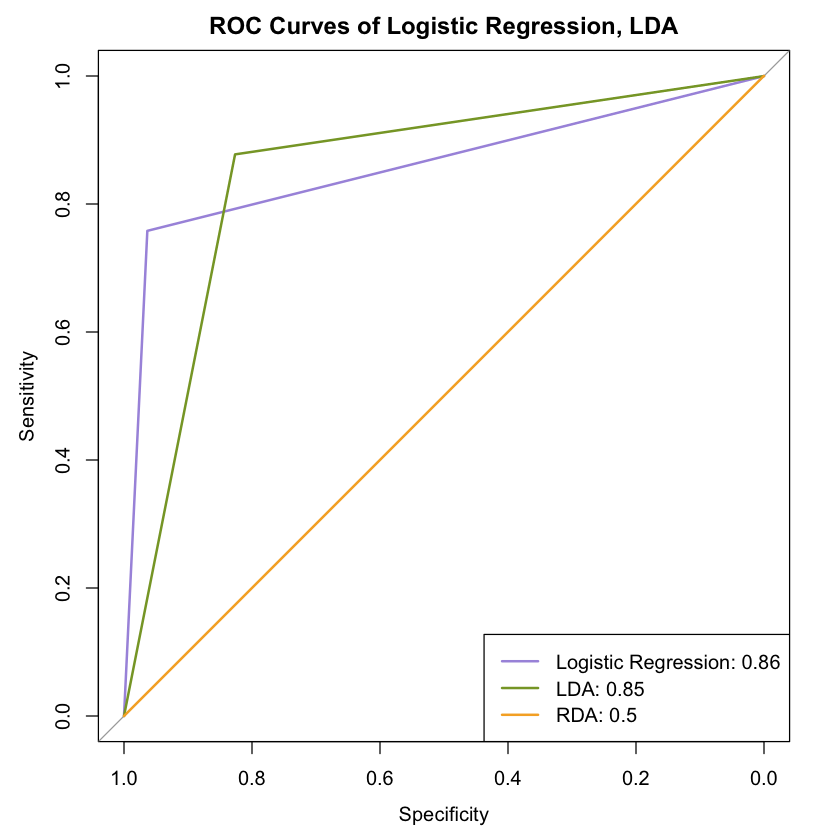

In [13]:
# plot ROC curves

lgm_str = paste0("Logistic Regression: ", round(lgm_roc$auc, digits=2))
lda_str = paste0("LDA: ", round(lda_roc$auc, digits=2))
rda_str = paste0("RDA: ", round(rda_roc$auc, digits=2))

# png("roc_curves.png")
plot(lgm_roc, col = "#a997df", main = "ROC Curves of Logistic Regression, LDA", ylim = c(0, 1), lwd = 2)
lines(lda_roc, col = "#87A330", lwd = 2)
lines(rda_roc, col = "#f6ae2d", lwd = 2)
legend("bottomright", legend = c(lgm_str, lda_str, rda_str),
       col = c("#a997df", "#87A330", "#f6ae2d"), lwd = 2)

# print AUC values
# cat("Logistic Regression AUC:", lgm_roc$auc, "\n")
# cat("LDA AUC:", lda_roc$auc, "\n")
# cat("QDA AUC:", qda_roc$auc, "\n")
# dev.off()

Since LDA and QDA, including RDA are not the best models for out datset, we compared the obtained accuracy with logistic regression model. We can see that logistic regression performed the best. But LDA can also be used as a model for our dataset if we have a small number of features.